### VoxCNN is a convolutional neural network (CNN) architecture designed for processing 3D volumetric data. It is commonly applied in tasks such as 3D object recognition, medical imaging analysis, and other applications involving voxelized 3D data.

# Basics of VoxCNN

### 1. Input Data: Voxel Representation
    
  * The input to VoxCNN is 3D voxel data. A voxel (volume pixel) represents a unit of a 3D grid, much like a pixel in 2D images.
  * Each voxel can store values such as density or occupancy to represent 3D structures or objects.



### 2. 3D Convolutions

   * VoxCNN uses 3D convolutional layers instead of standard 2D convolutions used in image-based CNNs.
   * A 3D convolutional filter slides over the 3D input data to extract spatial features in all three dimensions (width, height, depth).
   * This allows the network to learn volumetric features, capturing spatial relationships within the 3D structure.


### 3. Architecture Components


   1. **Convolutional Layers:** Extract local features from 3D data. Multiple layers allow the network to capture increasingly abstract representations.

   2. **Pooling Layers:** Typically 3D max-pooling layers reduce the spatial dimensions, making computations efficient and focusing on significant features.

   3. **Fully Connected Layers:** After convolutional and pooling layers, the output is flattened and passed through fully connected layers for classification or regression tasks.

   4. **Activation Functions:** Non-linearities like ReLU (Rectified Linear Unit) are applied after convolutional layers to introduce non-linear mappings.

### 4. Training and Optimization

  * **Loss Function**: The choice depends on the task (e.g., cross-entropy loss for classification or mean squared error for regression).

  * **Backpropagation**: The weights of the network are updated using backpropagation and an optimization algorithm like stochastic gradient descent (SGD) or Adam.

  * **Data Augmentation**: Techniques such as rotation, flipping, and cropping of voxel grids can be used to increase the diversity of the training dataset.

### 5. Applications

 * **3D Object Recognition**: Classifying 3D objects in datasets like ModelNet or ShapeNet.
 * **Medical Imaging**: Segmenting and classifying organs or lesions in 3D medical scans like CT or MRI.
 * **Robotics and Navigation**: Recognizing 3D environments for autonomous systems.

# Challenges

1. Computational Cost
    * Processing 3D data is computationally expensive due to the increased size of voxel grids compared to 2D images.
2. Data Representation
    * Voxel representation may lead to sparse data for high-resolution 3D objects, requiring efficient techniques like sparse convolutions or hybrid representations.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

In [2]:
# Example dataset
solid_cube = np.ones((5, 5, 5))
hollow_cube = np.array([
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]],
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]],
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]],
    [[1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 1, 1, 1, 1]],
    [[1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1]]
])

In [3]:
X_train = np.array([solid_cube, hollow_cube])
y_train = np.array([1, 0])  # Labels: 1 = solid, 0 = hollow

# Reshape to add channel dimension
X_train = X_train[..., np.newaxis]

In [4]:
# Model Definition
model = Sequential([
    Conv3D(16, (3, 3, 3), activation='relu', input_shape=(5, 5, 5, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1)

trained_model = model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6667 - loss: 0.6994 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6858 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6667 - loss: 0.6753
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 0.7026     
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6590 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 0.6902     
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6667 - loss: 0.6435 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 0.6795     
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6301 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 0.6702     
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3333 - loss: 0.6659    
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.66

In [7]:
# Evaluate the model on the training dataset
results = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {results[0]:.4f}, Accuracy: {results[1]:.4f}")

Loss: 0.5948, Accuracy: 1.0000


In [8]:
# Test with a new data point (solid cube example)
test_data = np.expand_dims(solid_cube, axis=(0, -1))  # Add batch and channel dimensions
prediction = model.predict(test_data)
predicted_class = np.argmax(prediction, axis=1)[0]
print(f"Predicted class for a solid cube: {predicted_class} (confidence: {prediction[0][predicted_class]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class for a solid cube: 1 (confidence: 0.60)


In [9]:
# Test with another data point (hollow cube example)
test_data = np.expand_dims(hollow_cube, axis=(0, -1))  # Add batch and channel dimensions
prediction = model.predict(test_data)
predicted_class = np.argmax(prediction, axis=1)[0]
print(f"Predicted class for a hollow cube: {predicted_class} (confidence: {prediction[0][predicted_class]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class for a hollow cube: 0 (confidence: 0.51)


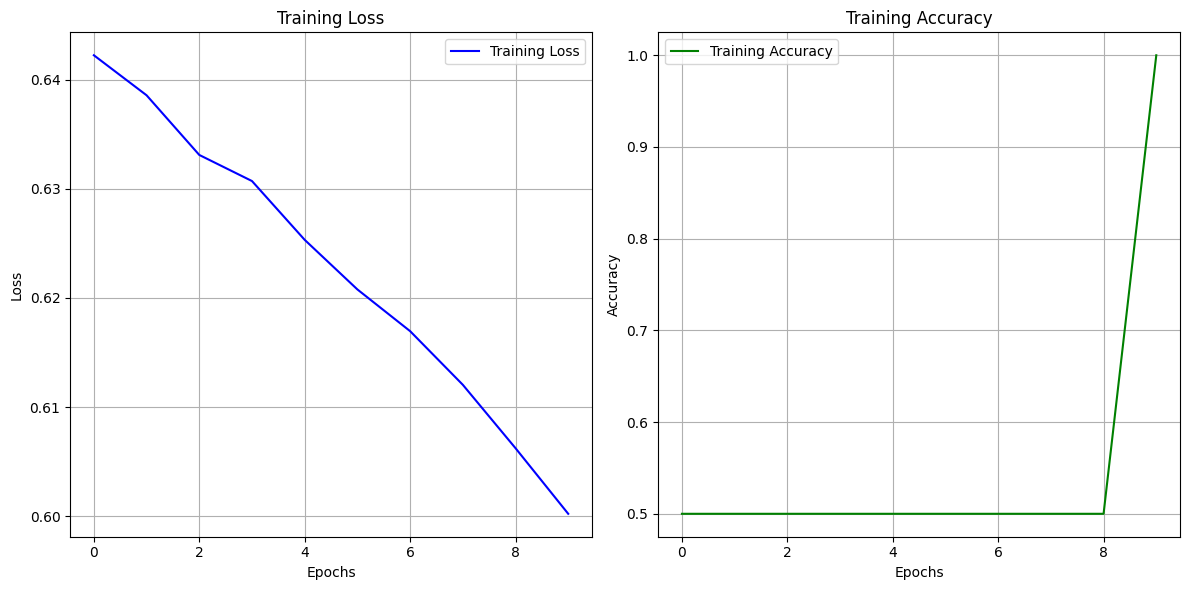

In [10]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history.history
loss = trained_model.history['loss']
accuracy = trained_model.history['accuracy']

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()

plt.tight_layout() Ensures that:

* Subplot titles don’t overlap with the axes or neighboring plots.
* X-axis or Y-axis labels are fully visible.
* Legends don’t get cropped.
* Works with plt.subplot, plt.subplots, and grids of plots.

# VoxCNN Model Architecture for the Example

We define a simple 3D CNN for binary classification:

## Layers

Input Layer: Accepts 5×5×5 voxel grids.

1.   Convolutional Layer
      *  A 3D convolutional layer with filters to detect patterns like edges and corners.

2.   Pooling Layer
      * A 3D max-pooling layer reduces the spatial dimensions.

3.  Fully Connected Layer
     * A dense layer maps features to the two classes (solid or hollow).

4.  Output Layer
    * Outputs probabilities for each class using softmax activation.

Example summery:
* Input: The model takes a 5×5×5 grid as input.
* Convolutional Layer: Extracts 3D spatial features, such as filled edges or hollow patterns.
* Pooling Layer: Reduces the size, focusing on key features.
* Fully Connected Layers: Maps features to binary classes (solid or hollow).